# Youtube Subscribers

Exploratory data analysis

## Table of contents

1. [Data loading and cleaning](youtube_subscribers.ipynb#data-loading-and-cleaning)
2. [Top 10 Youtube Channels](#top-10-youtube-channels)
3. [Subscribers by Language](#subscribers-by-language)
4. [Subscribers by Category](#subscribers-by-category)
5. [Subscribers by Country](#subscribers-by-country)

## Data Loading and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/youtube_subscribers_data.csv')

In [3]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia


In [4]:
df.tail()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
45,ARY Digital HD,Yes,59.7,Urdu,Entertainment,Pakistan
46,Fede Vigevani,No,59.4,Spanish,Entertainment,Mexico
47,LooLoo Kids,Yes,59.3,English,Music,Romania
48,BillionSurpriseToys,Yes,57.6,English,Entertainment,United States
49,Marshmello,No,57.5,English,Music,United States


In [5]:
df.isnull().sum()

Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

In [6]:
df.dtypes

Name                       object
Brand channel              object
Subscribers (millions)    float64
Primary language           object
Category                   object
Country                    object
dtype: object

In [7]:
df.describe()

,Subscribers (millions)
count,50.000000
mean,90.962000
std,53.066727
min,57.500000
25%,62.900000
50%,71.200000
75%,96.950000
max,335.000000


## Top 10 Youtube Channels

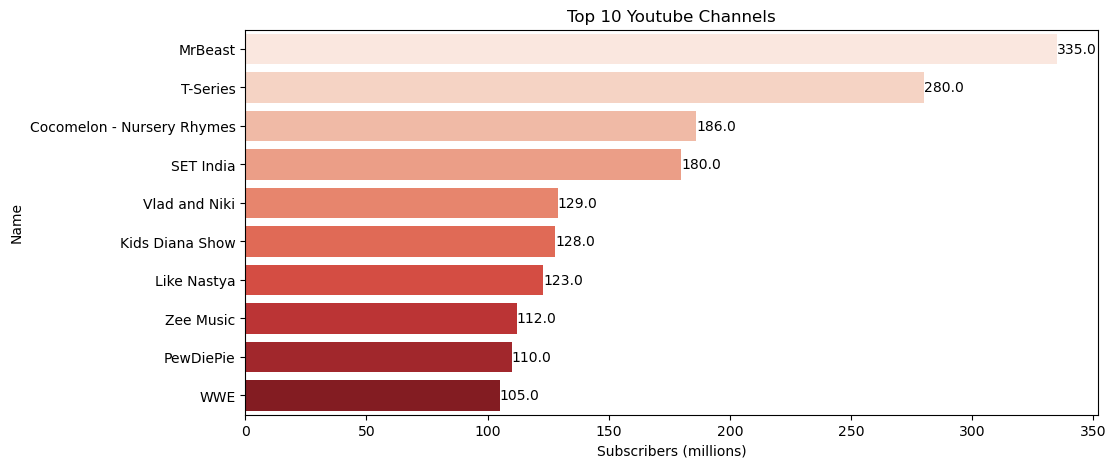

In [8]:
top_10 = df.head(10)

plt.figure(figsize=(11,5))
ax = sns.barplot(data=top_10,
            x='Subscribers (millions)',
            y='Name',
            errorbar=None,
            palette='Reds')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.xlabel('Subscribers (millions)')
plt.ylabel('Name')
plt.title('Top 10 Youtube Channels')
plt.show()

## Subscribers by Language

In [9]:
df.groupby('Primary language')['Subscribers (millions)'].count()


Primary language
Arabic                  1
Bhojpuri                1
English                21
Hindi                  15
Korean                  4
Malayalam               1
Portuguese              1
Portuguese, English     1
Russian                 1
Spanish                 2
Urdu                    2
Name: Subscribers (millions), dtype: int64

In [10]:
subscribers_by_language = df.groupby('Primary language')['Subscribers (millions)'].sum().reset_index().sort_values(by= 'Subscribers (millions)', ascending= False)

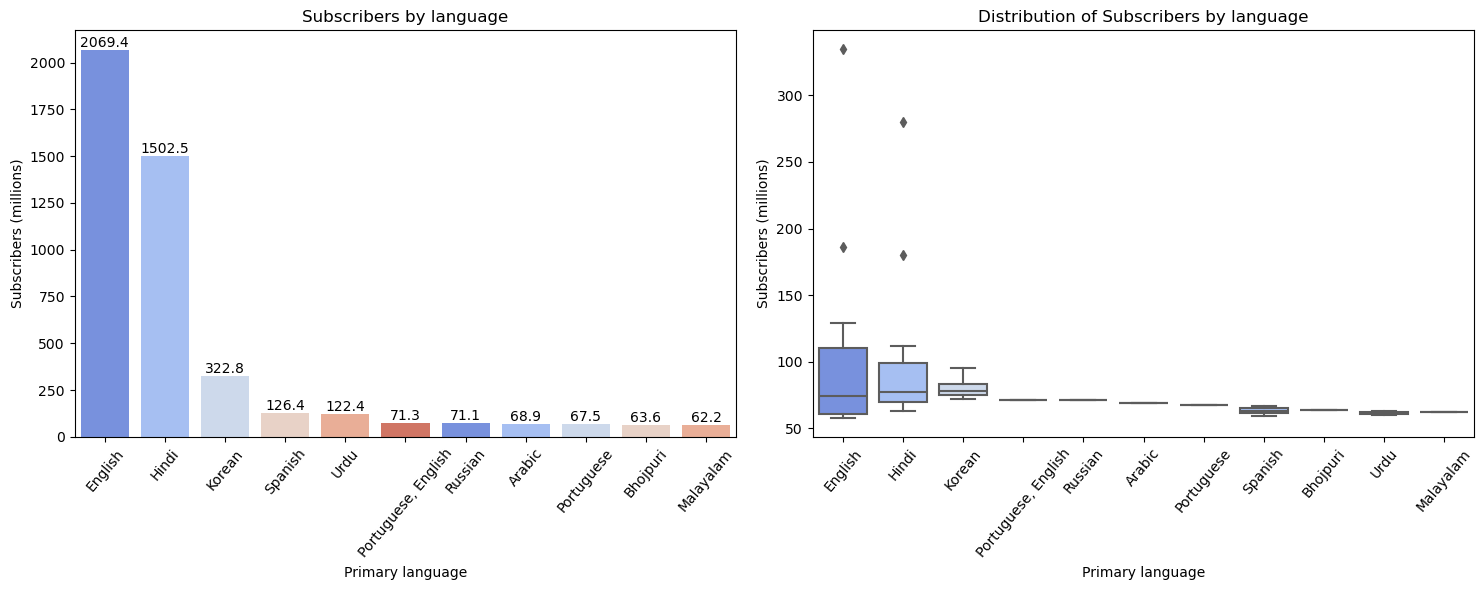

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Barplot 

ax1 = sns.barplot(
    data= subscribers_by_language,
    y= 'Subscribers (millions)',
    x= 'Primary language',
    palette= sns.color_palette('coolwarm'),
    ax= axes[0]
)
ax1.set(title= 'Subscribers by language')
ax1.tick_params(axis='x', rotation=50)  

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f')

# --------------------------------------------

# Boxplot

ax2 = sns.boxplot(
    data= df,
    y= 'Subscribers (millions)',
    x= 'Primary language',
    palette= sns.color_palette('coolwarm'),
    ax= axes[1]
)
ax2.set(title= 'Distribution of Subscribers by language')
ax2.tick_params(axis='x', rotation = 50)

plt.tight_layout()
plt.show()

## Subscribers by Category

In [12]:
df.groupby('Category')['Subscribers (millions)'].count()

Category
Comedy                      1
Education                   4
Education/Entertainment     1
Entertainment              20
Entertainment/Sports        1
Film                        2
How-to                      1
Lifestyle Vlogs             1
Music                      17
News                        1
Sports                      1
Name: Subscribers (millions), dtype: int64

In [13]:
subscribers_by_category = df.groupby('Category')['Subscribers (millions)'].count().reset_index().sort_values(by= 'Subscribers (millions)', ascending= False)

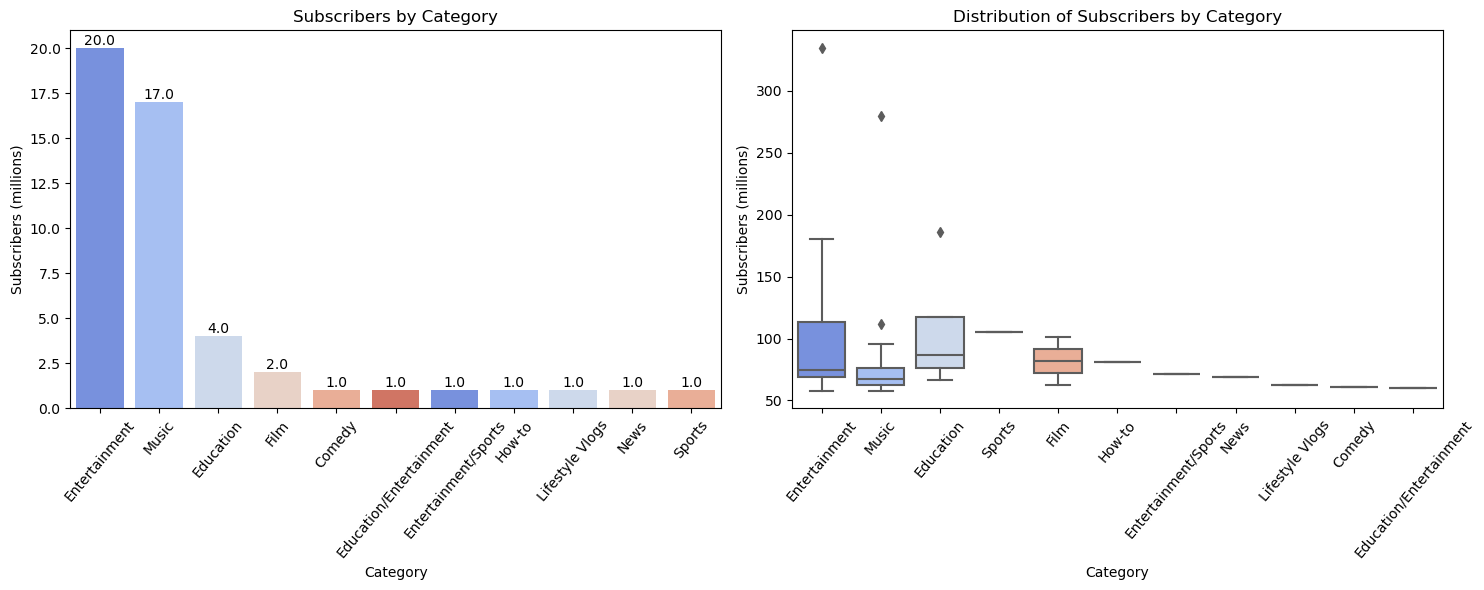

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Barplot

ax1 = sns.barplot(
    data= subscribers_by_category,
    y= 'Subscribers (millions)',
    x= 'Category',
    palette= sns.color_palette('coolwarm'),
    ax= axes[0]
)
ax1.set(title= 'Subscribers by Category')
ax1.tick_params(axis='x', rotation=50)  

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f')

# ------------------------------------------

# Boxplot

ax2 = sns.boxplot(
    data= df,
    y= 'Subscribers (millions)',
    x= 'Category',
    palette= sns.color_palette('coolwarm'),
    ax= axes[1]
)
ax2.set(title= 'Distribution of Subscribers by Category')
ax2.tick_params(axis='x', rotation = 50)


plt.tight_layout()
plt.show()

## Subscribers by Country

In [15]:
df.groupby('Country')['Subscribers (millions)'].count()

Country
Argentina                  1
Belarus                    1
Brazil                     1
Canada                     1
Cyprus[a]                  1
India                     17
Mexico                     1
Pakistan                   2
Portugal                   1
Romania                    1
Russia                     1
South Korea                5
Sweden  Japan              1
United Arab Emirates       1
United States             13
United States  Ukraine     2
Name: Subscribers (millions), dtype: int64

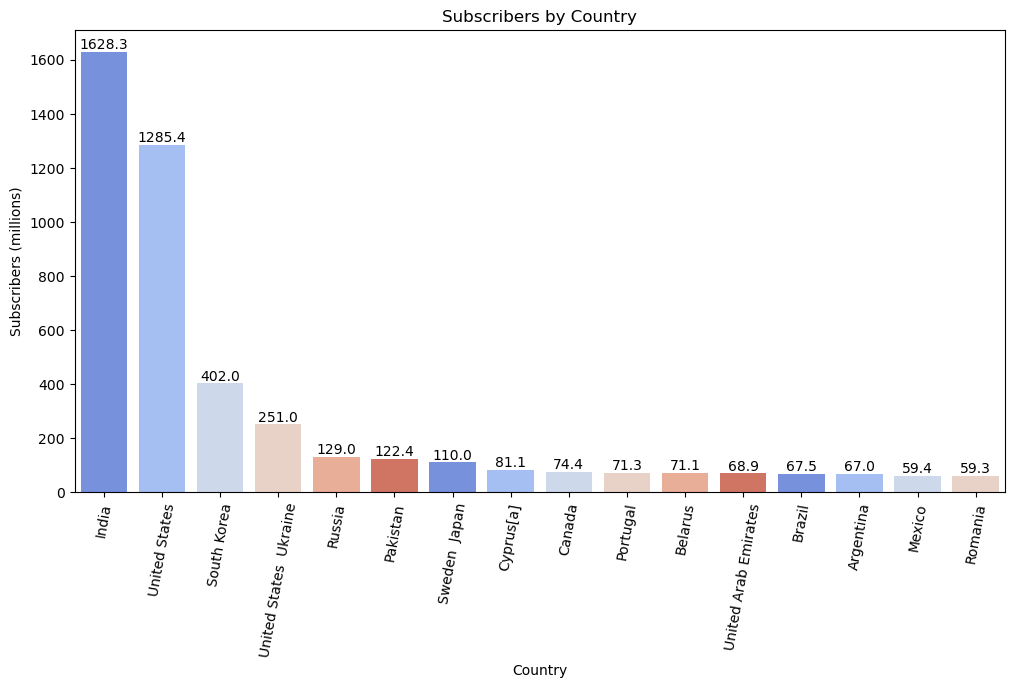

In [16]:
subscribers_by_country = df.groupby('Country')['Subscribers (millions)'].sum().reset_index().sort_values(by= 'Subscribers (millions)', ascending= False)


plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data= subscribers_by_country,
    y= 'Subscribers (millions)',
    x= 'Country',
    palette= sns.color_palette('coolwarm')
)
ax.set(title= 'Subscribers by Country')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.xticks(rotation = 80)
plt.show()